## Introduction
    We are analysing the trends in Employment data of NEIS scheme. As a part of this data story, we will analyse:
        1) The data points and the features involved in the dataset.
        2) Understand the Influence of some features on the success indicator (Indicates whether business is   
           successful).
        3) Understand the personality types and Communities involved in this data set.

#### Determine the data points and the number of features in the dataset. 
    Import the data from the excel and analyse the dataset and number of features involved in the data

In [45]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

#Understanding the data
dictionary = pd.read_excel("Data/neis-data-dictionary_terms.xlsx")
main       = pd.read_excel("Data/neisdatagovhack_Main.xlsx")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
print(main_df.info())
main_df = main_df.replace(np.nan, 0, regex=True)
print(main_df.info())
print(main_df.head())
print(main_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53646 entries, 0 to 53645
Data columns (total 38 columns):
business_id           53646 non-null int64
start_date            53646 non-null datetime64[ns]
end_date              53646 non-null datetime64[ns]
neis_type             53646 non-null object
exit_reason           53599 non-null object
successful            53646 non-null object
anzsic_code           53596 non-null float64
industry_type         53646 non-null object
state                 53646 non-null object
metro                 53646 non-null int64
age_group             53646 non-null object
gender_cd             53646 non-null object
indigenous_ind        53646 non-null object
ex_offender_ind       53646 non-null object
nesb_ind              53646 non-null object
refugee_ind           53646 non-null object
disability_ind        53646 non-null object
homeless_ind          53646 non-null object
sole_parent_ind       53646 non-null object
neis_allowance_ind    53646 non-null obj

### What are the different communities involved in the NEIS business schemes and their respective success rates?

In [46]:
#Understanding involvement of communities in businesses and are their success rates
main_person = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind'],var_name='Personality',value_name='PersVal')
main_filter = main_person.query("PersVal == 'Y'")
#Replace the values with numbers to plot graphs
main_filter['PersVal'].replace(to_replace=dict(Y=1, N=0), inplace=True)
main_filter['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
#print(main_filter.head(3))

#Set the index
main_filter.set_index = ['industry_type','successful','Personality']

# Aggregate on 'industry_type','Personality','successful' to get the count of people involved
####Data frame main_aggr will be used in various data visualisation to understand the correlation between the Personality
# of the business owner, Industry type, success rate etc.
main_aggr = main_filter.groupby(['industry_type','Personality','successful']).size().rename('count').reset_index()
#print(main_aggr.head())
print(main_aggr.info())


# Replace N/A values with 0 in the columns of pivot table
main_pivot_df = main_filter.pivot_table(values=None, index=['industry_type','successful'], columns='Personality', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')

# Pivot table is displayed to understand the involvement of various personalities in various businesses and their success
# rate
print(main_pivot_df)

#print(main_aggr.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
industry_type    227 non-null object
Personality      227 non-null object
successful       227 non-null int64
count            227 non-null int64
dtypes: int64(2), object(2)
memory usage: 7.2+ KB
None
                                                  PersVal                  \
Personality                                disability_ind ex_offender_ind   
industry_type                   successful                                  
accommodation_cafes_restaurants 0                      65               5   
                                1                     107               7   
agriculture_forestry_fishing    0                      70               7   
                                1                     151              26   
communication                   0                      23               4   
                                1                      42              12   
co

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Inference: On analysing the pivot Table, we find that:
1) People with disabilities were involved in large numbers (than any other personality type) 
   in almost all of the industry types.
    
2) More people are involved in wholesale trade

3) Large proportions of business owners belong to personality type "Sole Parents"

4) Business owners with "disablitity" (indicator) are largely successful in "Personal and services" industry

### Which personality types are involved(in Businesses) in more number than their counterparts?

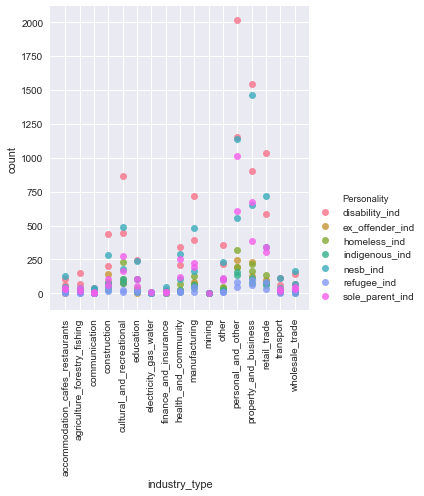

In [47]:
# Personalities involved in various industries
_ = sns.lmplot(data=main_aggr,x='industry_type',y='count',hue='Personality',fit_reg=False)
plt.xticks(rotation=90)
plt.show()


### Inference: On analysing the scatter plot, we find that:
Among the Personality types (involved in business), certain categories
such as "disablity","Culturally diverse backgrounds"(NESB_IND) are involved in businesses in larger
numbers than their counterparts - This can be proven using a bar plot

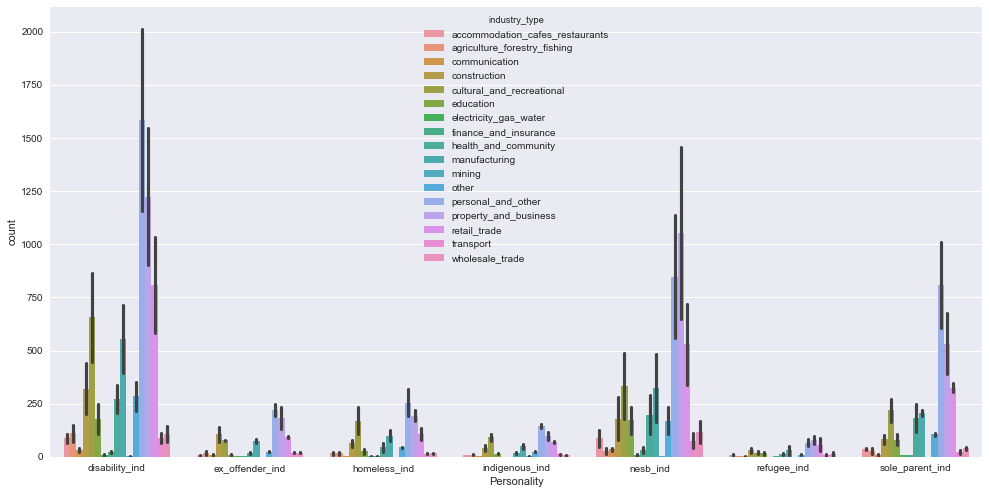

In [48]:
# Bar plot that shows personalities with 'Diability' or 'from diverse cultural background' are involved in more numbers 
# under NEIS scheme
sns.set(rc={'figure.figsize':(16.7,8.27)})
_ = sns.barplot(x='Personality',y='count',hue='industry_type',data=main_aggr)
plt.show()

### What is the success/ failure ratio among different businesses?

                      industry_type  successful  count  failed  Failcount  \
0   accommodation_cafes_restaurants           1    326       0        166   
1      agriculture_forestry_fishing           1    299       0        126   
2                     communication           1    116       0         68   
3                      construction           1   1142       0        500   
4         cultural_and_recreational           1   2073       0       1061   
5                         education           1    675       0        311   
6             electricity_gas_water           1     39       0         12   
7             finance_and_insurance           1     93       0         51   
8              health_and_community           1   1012       0        486   
9                     manufacturing           1   1740       0        935   
10                           mining           1     10       0          5   
11                            other           1    811       0        508   

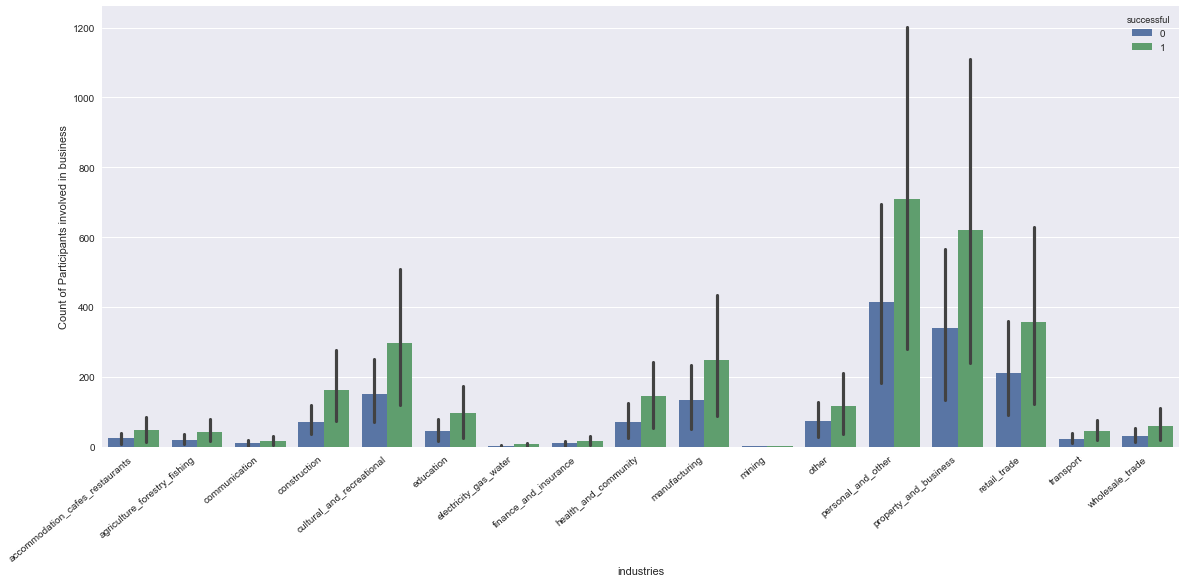

In [49]:
# Visualising the success/Failure ratio in various 'Industries'
sns.set()

# Find the 'Actual ratio for various industries and display it in a table format'
main_ind = main_filter.groupby(['industry_type','successful']).size().rename('count').reset_index()
#print(main_ind.head())
main_ind_success = main_ind[main_ind.successful > 0]
main_ind_failed  = main_ind[main_ind.successful == 0]
main_ind_failed.columns = ['industry_type','failed','Failcount']
main_ind_cons = main_ind_success.merge(main_ind_failed,on='industry_type')
main_ind_cons['total'] = main_ind_cons['count'].add(main_ind_cons['Failcount'].values, axis = 0)
main_ind_cons['success_ratio'] = main_ind_cons['count'].div(main_ind_cons['total'].values,axis = 0)
print(main_ind_cons)

# Display graphically the success and failure count of various businessses
_ = sns.barplot(x='industry_type',y='count', hue='successful',data=main_aggr) #main_aggr.reset_index()) ,hue='Personality'
_.set_xticklabels(_.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('industries')
plt.ylabel('Count of Participants involved in business')
plt.show()

Although the success ratio is similar for most of the businesses. 2 of them standout with a ratio of more than 0.70.
Both the 'Agriculture' and 'Electricity/Gas/water' sectors have a success ratio of 0.70 and more.

### Which businesses have large number of participants?

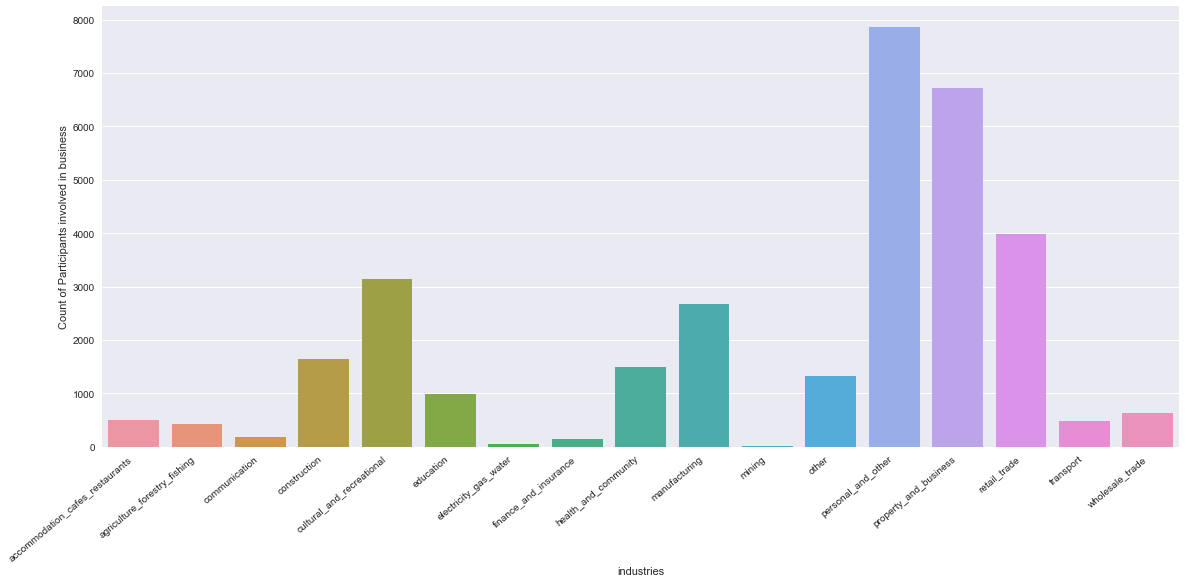

In [50]:
sns.set()
_ = sns.barplot(x='industry_type',y='total', data=main_ind_cons) #main_aggr.reset_index()) ,hue='Personality'
_.set_xticklabels(_.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('industries')
plt.ylabel('Count of Participants involved in business')
plt.show()

"Real estate" and "Personal care/ services" are the most popular among participants, followed by Retail trade. 
This gives us an indication of business areas, where the Agency officials should focus their time/efforts mostly on.

## Conclusion:

Based on the above analysis, we can infer that:
    
    1) Although there are 53646 data points/ records, some of the columns have Nan's, which makes it difficult to
       consider those features during classification
        
    2) There are nearly 38 features. But some of them may not be required for analysis. 
       For instance, anzsic_code (industry code for Business).
        
    3) Certain categories/ Personalities such as "disablity","Culturally diverse backgrounds"(NESB_IND) are 
       involved in businesses in larger numbers than their counterparts
        
    4) Both 'Agriculture' and 'Electricity/Gas/water' sectors have a higher success ratio than other Businesses.
    
    5) "Real estate" and "Personal care/ services" are the most popular among participants, followed by Retail trade